# Every Method Compare

## PDE: Separation of Variables

Consider the 2D Laplace equation
$$
  \frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2} = 0 
$$

within the domain $0 \le x \le a$ and $0\le y \le b$,
and with boundary conditions
* $u(x,0) =0$
* $u(x,b) =0$
* $u(a,y) =0$
* $u(0,y) =f(y)$.

The solution is
$$
  u(x,y)=\sum_{n=1}^{\infty} B_n 
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$
where
$$
  B_n = \frac{2}{b\sinh[n\pi a/b]} \int_0^b f(y)   \sin\left[ n \pi \frac{y}{b} \right] dy
$$

For the case where $f(y)=u_0$
$$
  u(x,y)=\sum_{n \text{odd}}
  \frac{4u_0}{n\pi\sinh[n\pi a/b]}
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$

41.0


C:\Users\dppss\AppData\Local\Temp/ipykernel_6008/1238108641.py:33: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pvj, orientation="horizontal", pad=0.15)


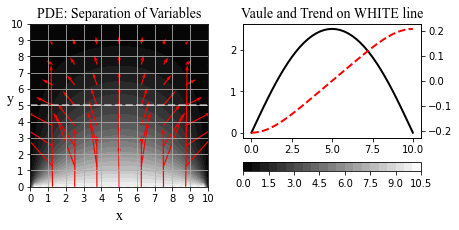

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))

a = 10
b = 10
u0 = 10

fineness = 0.25
a_total = (a)/fineness + 1
b_total = (b)/fineness + 1
print(a_total)

iteration = 200
levels = 20
center = int((a_total-1)/2)

x = np.linspace(0, a, int(a_total))
y = np.linspace(0, b, int(b_total))
X, Y = np.meshgrid(x, y)
V = np.zeros_like(X)

for i in range(1, iteration, 2):
    Bn = 4*u0 / (i*np.pi*np.sinh(i*np.pi*a / b))
    V = V + Bn*np.sinh(i*np.pi*(a - Y) / b)*np.sin(i*np.pi*X / b)

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0].contourf(X, Y, V, levels, cmap=cm.gray)
fig.colorbar(pvj, orientation="horizontal", pad=0.15)
p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(0, 10, 11))
p[0].set_yticks(np.linspace(0, 10, 11))
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)


p[1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)



p[0].set_title("PDE: Separation of Variables", fontsize=14, fontname='Times New Roman')
p[1].set_title("Vaule and Trend on WHITE line", fontsize=14, fontname='Times New Roman')
plt.savefig("FR-9.pdf")

## Discretization and the relaxation method

We consider a mesh of grid points that covers the domain of interest. For simplicity we assume in each direction the spacing between grid points is $h$.

$$
  (x_i, y_j, z_k) = (x_0, y_0, z_0) + h (i, j, k).
$$

We need to find the discretized version of the differential operator $\nabla^2$.

We first Taylor expand $V(x,y,z)$ in $x$ to second order:

$$
  V(x\pm h,y,z) = V(x,y,z) \pm h \frac{\partial V}{\partial x} + \frac{1}{2}h^2 \frac{\partial^2 V}{\partial x^2} + \cdots
$$

so that

$$
  \frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+h)+V(x-h)-2V(x)}{h^2}
$$
and similarly for $y$ and $z$.

We hence obtain the discrete approximation to the laplacian:

$$
  \nabla^2 V \approx
  \frac{V(x+h,y,z)+V(x-h,y,z)-2V(x,y,z)}{h^2} + \frac{V(x,y+h,z)+V(x,y-h,z)-2V(x,y,z)}{h^2} + \frac{V(x,y,z+h)+V(x,y,z-h)-2V(x,y,z)}{h^2}
$$

If we use a grid notation
* $V(x, y, z)=V_{i,j,k}$
* $V(x+h, y, z)=V_{i+1, j, k}$
* $V(x, y+h, z)=V_{i, j+1, k}$
* $V(x, y, z+h)=V_{i, j, k+1}$

then the discretized verion of Laplace's equation becomes

$$
  h^2 \nabla^2 V = 0 \approx 
  \left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right)
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} \right).
$$

C:\Users\dppss\AppData\Local\Temp/ipykernel_6008/3257491964.py:41: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pvj, orientation="horizontal", pad=0.15)


41.0


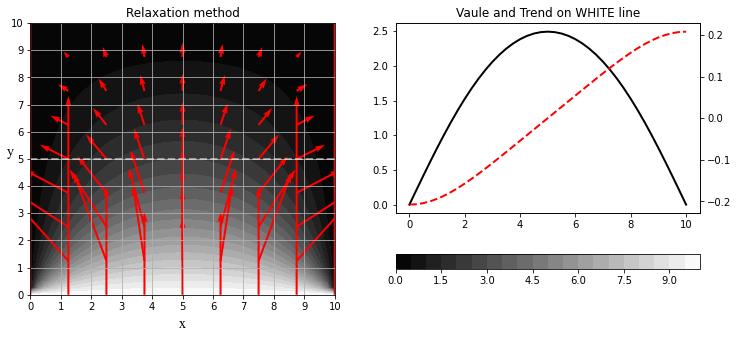

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

iteration = 1000
fineness = 0.25

x_start = 0
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = +10
y_total = x_total
center = int((x_total-1)/2)

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 10)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0].contourf(X, Y, V, levels, cmap=cm.gray)
fig.colorbar(pvj, orientation="horizontal", pad=0.15)
p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(0, 10, 11))
p[0].set_yticks(np.linspace(0, 10, 11))
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0].set_title("Relaxation method")

p[1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

## Tasks: Overrelaxation

We can use the following update
$$
  V^{n+1}_{i,j} = \omega V^n_{AVG} + (1-\omega)V^n_{i,j},
$$
where $V_{AVG}$ is a shorthand for the average nearest-neighbor potential and the parameter $0<\omega<2$ is known as the **overrelazation parameter**.
* $\omega<1 \rightarrow$ **underrelaxation**.
* $\omega>1 \rightarrow$ **overrelaxation**.
* $\omega=1 \rightarrow$ standard update.

Modify your code for a single rectanglualr bounary and identify the best $\omega$ for this problem.

C:\Users\dppss\AppData\Local\Temp/ipykernel_6008/3885615514.py:45: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(pvj, orientation="horizontal", pad=0.15)


41.0


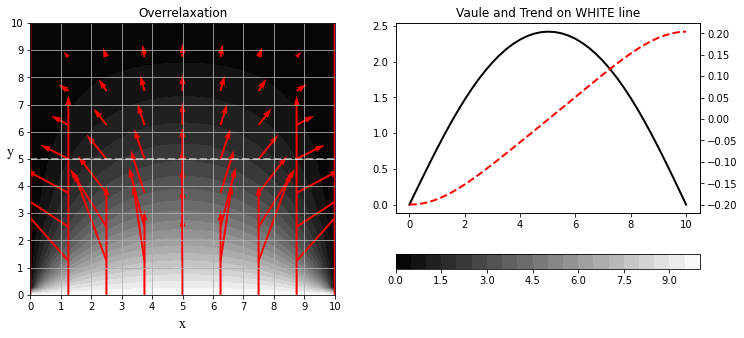

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

fineness = 0.25
iteration = 100
levels = 20
omega = 1.7

x_start = 0
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = +10
y_total = x_total

center = int((x_total-1)/2)
shift = int((x_total-1)/4)

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 10)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = omega*((V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4) + (1-omega)*V[j, i]

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0].contourf(X, Y, V, levels, cmap=cm.gray)
fig.colorbar(pvj, orientation="horizontal", pad=0.15)
p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(0, 10, 11))
p[0].set_yticks(np.linspace(0, 10, 11))
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0].set_title("Overrelaxation")

p[1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

## Tasks: Multigrid methods

Consider a squre boundary. 
* Starting with $2^0+1$ points (including the boundary point) in each direction. 
* Iterate a copule of times then perform the **prologation** from the coarse grid $(2^0+1)$ to the find grid $(2^1+1)$.
* Repeat the same procedue until you reach the finest grid with $2^N+1$ points, where $N$ is assinged by you.

Compre to a standard simulation with $2^N+1$, which way converges faster?

11.0
21
41


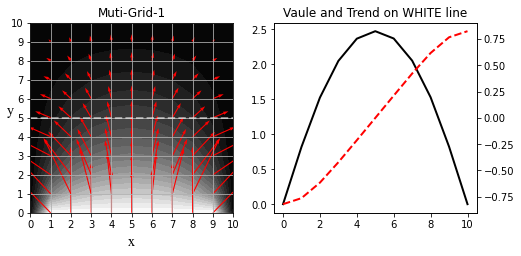

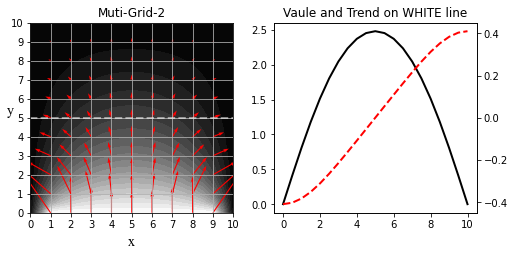

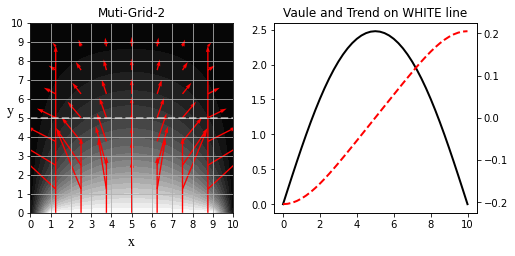

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, ppp = plt.subplots(ncols=2, nrows=1, figsize=(8, 3.5))

fineness = 1
iteration = 50
levels = 20

x_start = 0
x_end   = 10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = 10
y_total = x_total

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCD, BCU, BCR, BCL = (10, 0, 0, 0)
V[0, :] = BCD
V[int(x_total-1), :] = BCU
V[:, 0] = BCL
V[:, int(y_total-1)] = BCR

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4

center = int((x_total-1)/2)
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 1),slice(None, None, 1))

ppp[0].contourf(X, Y, V, levels, cmap=cm.gray)
ppp[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=10)
ppp[0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
ppp[0].set_xticks(np.linspace(x_start, x_end, 11))
ppp[0].set_yticks(np.linspace(x_start, x_end, 11))
ppp[0].grid()
ppp[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
ppp[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
ppp[0].set_title("Muti-Grid-1")

ppp[1].plot(x, V[center,:],'k', lw = 2)
ax2=ppp[1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
ppp[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

x_total = int(len(x)*2) - 1
y_total = x_total
center = int((x_total-1)/2)

plt.savefig("FR-12a1.pdf")
fig, pp = plt.subplots(ncols=2, nrows=1, figsize=(8, 3.5))

x2 = np.linspace(x_start, x_end, x_total)
y2 = np.linspace(y_start, y_end, y_total)

X2, Y2 = np.meshgrid(x2, y2, indexing = 'xy')
V2 = np.zeros_like(X2)

for i in range(0, len(x)):
    for j in range(0, len(y)):
        V2[2*(j), 2*(i)] = V[j, i]

for i in range(0, len(x)):
    for j in range(0, len(y)):
        if (i <= len(x)-2 and j <= len(y)-2):
            V2[2*(j), 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)])/2
            V2[2*(j)+1, 2*(i)] = (V2[2*(j), 2*(i)] + V2[2*(j+1), 2*(i)])/2
            V2[2*(j)+1, 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)] + V2[2*(j+1), 2*(i)] + V2[2*(j+1), 2*(i+1)])/4
        if (i == len(x)-1 and j <= len(y)-2):
            V2[2*(j)+1, 2*(i)] = (V2[2*(j), 2*(i)] + V2[2*(j+1), 2*(i)])/2
        if (i <= len(x)-2 and j == len(y)-1):
            V2[2*(j), 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)])/2

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V2[j, i] = (V2[j-1, i] + V2[j+1, i] + V2[j, i-1] + V2[j, i+1])/4

Ey, Ex = np.gradient(-V2)
skip = (slice(None, None, 2),slice(None, None, 2))

pp[0].contourf(X2, Y2, V2, levels, cmap=cm.gray)
pp[0].quiver(X2[skip], Y2[skip], Ex[skip], Ey[skip], color = 'r', scale=10)
pp[0].plot(x2, Y2[center,:],'--w', lw = 2, alpha = .5)
pp[0].set_xticks(np.linspace(x_start, x_end, 11))
pp[0].set_yticks(np.linspace(x_start, x_end, 11))
pp[0].grid()
pp[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
pp[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
pp[0].set_title("Muti-Grid-2")

pp[1].plot(x2, V2[center,:],'k', lw = 2)
ax2=pp[1].twinx()
ax2.plot(x2, Ex[center,:],'--r', lw = 2)
pp[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

plt.savefig("FR-12a2.pdf")
fig, p = plt.subplots(ncols=2, nrows=1, figsize=(8, 3.5))

x_total = int(len(x2)*2) - 1
y_total = x_total
center = int((x_total-1)/2)

x3 = np.linspace(x_start, x_end, int(x_total))
y3 = np.linspace(y_start, y_end, int(y_total))

X3, Y3 = np.meshgrid(x3, y3, indexing = 'xy')
V3 = np.zeros_like(X3)

for i in range(0, len(x2)):
    for j in range(0, len(y2)):
        V3[2*(j), 2*(i)] = V2[j, i]

for i in range(0, len(x2)):
    for j in range(0, len(y2)):
        if (i <= len(x2)-2 and j <= len(y2)-2):
            V3[2*(j), 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)])/2
            V3[2*(j)+1, 2*(i)] = (V3[2*(j), 2*(i)] + V3[2*(j+1), 2*(i)])/2
            V3[2*(j)+1, 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)] + V3[2*(j+1), 2*(i)] + V3[2*(j+1), 2*(i+1)])/4
        if (i == len(x2)-1 and j <= len(y2)-2):
            V3[2*(j)+1, 2*(i)] = (V3[2*(j), 2*(i)] + V3[2*(j+1), 2*(i)])/2
        if (i <= len(x2)-2 and j == len(y2)-1):
            V3[2*(j), 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)])/2

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V3[j, i] = (V3[j-1, i] + V3[j+1, i] + V3[j, i-1] + V3[j, i+1])/4

Ey, Ex = np.gradient(-V3)
skip = (slice(None, None, 5),slice(None, None, 5))

p[0].contourf(X3, Y3, V3, levels, cmap=cm.gray)
p[0].quiver(X3[skip], Y3[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[0].plot(x3, Y3[center,:],'--w', lw = 2, alpha = .5)
p[0].set_xticks(np.linspace(x_start, x_end, 11))
p[0].set_yticks(np.linspace(x_start, x_end, 11))
p[0].grid()
p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0].set_title("Muti-Grid-2")

p[1].plot(x3, V3[center,:],'k', lw = 2)
ax2=p[1].twinx()
ax2.plot(x3, Ex[center,:],'--r', lw = 2)
p[1].set_title("Vaule and Trend on WHITE line")
print(x_total)

plt.savefig("FR-12a3.pdf")

# The Comparation of each Situation

## PDE: Separation of Variables & Relaxation method

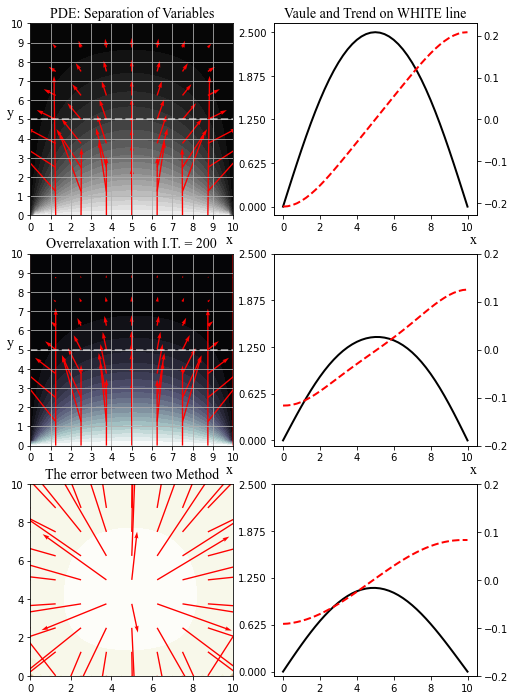

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))

################
a = 10
b = 10
u0 = 10

fineness = 0.25
a_total = (a)/fineness + 1
b_total = (b)/fineness + 1

iterationPDE = 200
levels = 20
centerPDE = int((a_total-1)/2)

xPDE = np.linspace(0, a, int(a_total))
yPDE = np.linspace(0, b, int(b_total))
XPDE, YPDE = np.meshgrid(xPDE, yPDE)
VPDE = np.zeros_like(XPDE)

for i in range(1, iterationPDE, 2):
    Bn = 4*u0 / (i*np.pi*np.sinh(i*np.pi*a / b))
    VPDE = VPDE + Bn*np.sinh(i*np.pi*(a - YPDE) / b)*np.sin(i*np.pi*XPDE / b)

EyPDE, ExPDE = np.gradient(-VPDE)
skip = (slice(None, None, 5),slice(None, None, 5))

p[0, 0].contourf(XPDE, YPDE, VPDE, levels, cmap=cm.gray)
p[0, 0].quiver(XPDE[skip], YPDE[skip], ExPDE[skip], EyPDE[skip], color = 'r', scale=2)
p[0, 0].plot(xPDE, YPDE[centerPDE,:],'--w', lw = 2, alpha = .5)
p[0, 0].set_xticks(np.linspace(0, a, 11))
p[0, 0].set_yticks(np.linspace(0, b, 11))
p[0, 0].grid()
p[0, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[0, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0, 0].set_title("PDE: Separation of Variables", fontsize = 14, fontname = 'Times New Roman')

p[0, 1].plot(xPDE, VPDE[centerPDE,:],'k', lw = 2)
p[0, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[0, 1].twinx()
ax2.plot(xPDE, ExPDE[centerPDE,:],'--r', lw = 2)
p[0, 1].set_title("Vaule and Trend on WHITE line", fontsize = 14, fontname = 'Times New Roman')
p[0, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

###############
fineness = 0.25
iteration = 200

x_start = 0
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = +10
y_total = x_total
center = int((x_total-1)/2)

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 10)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

p[1, 0].contourf(X, Y, V, levels, cmap=cm.bone)
p[1, 0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[1, 0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[1, 0].set_xticks(np.linspace(0, 10, 11))
p[1, 0].set_yticks(np.linspace(0, 10, 11))
p[1, 0].grid()
p[1, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[1, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
lable_name = "Overrelaxation with I.T. = " + str('%d' % iteration)
p[1, 0].set_title(lable_name, fontsize = 14, fontname = 'Times New Roman')

p[1, 1].plot(x, V[center,:],'k', lw = 2)
p[1, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[1, 1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

####################

p[2, 0].contourf(X, Y, VPDE-V, levels, cmap=cm.pink)
p[2, 0].quiver(X[skip], Y[skip], ExPDE[skip]-Ex[skip], EyPDE[skip]-Ey[skip], color = 'r', scale=0.1)
p[2, 0].set_title("The error between two Method", fontsize = 14, fontname = 'Times New Roman')
p[2, 1].plot(x, VPDE[center,:]-V[center,:],'k', lw = 2)
ax2=p[2, 1].twinx()
ax2.plot(x, ExPDE[center,:]-Ex[center,:],'--r', lw = 2)
p[2, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

plt.savefig("FR-10.pdf")

## PDE: Separation of Variables & Overrelaxation

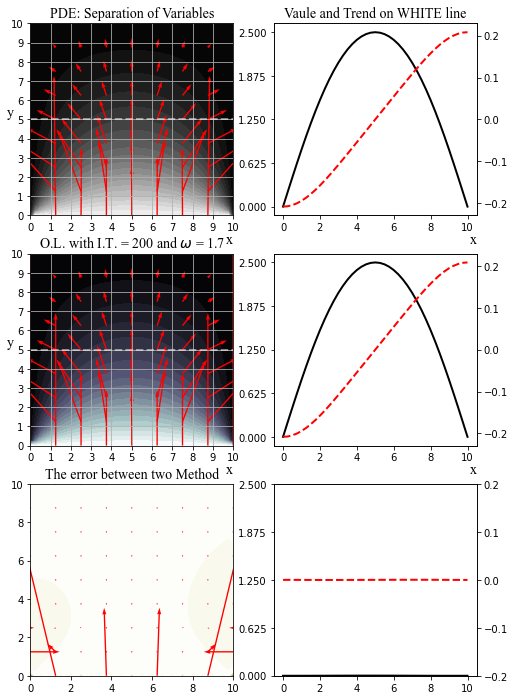

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))

################
a = 10
b = 10
u0 = 10

fineness = 0.25
a_total = (a)/fineness + 1
b_total = (b)/fineness + 1

iterationPDE = 200
levels = 20
centerPDE = int((a_total-1)/2)

xPDE = np.linspace(0, a, int(a_total))
yPDE = np.linspace(0, b, int(b_total))
XPDE, YPDE = np.meshgrid(xPDE, yPDE)
VPDE = np.zeros_like(XPDE)

for i in range(1, iterationPDE, 2):
    Bn = 4*u0 / (i*np.pi*np.sinh(i*np.pi*a / b))
    VPDE = VPDE + Bn*np.sinh(i*np.pi*(a - YPDE) / b)*np.sin(i*np.pi*XPDE / b)

EyPDE, ExPDE = np.gradient(-VPDE)
skip = (slice(None, None, 5),slice(None, None, 5))

p[0, 0].contourf(XPDE, YPDE, VPDE, levels, cmap=cm.gray)
p[0, 0].quiver(XPDE[skip], YPDE[skip], ExPDE[skip], EyPDE[skip], color = 'r', scale=2)
p[0, 0].plot(xPDE, YPDE[centerPDE,:],'--w', lw = 2, alpha = .5)
p[0, 0].set_xticks(np.linspace(0, a, 11))
p[0, 0].set_yticks(np.linspace(0, b, 11))
p[0, 0].grid()
p[0, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[0, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0, 0].set_title("PDE: Separation of Variables", fontsize = 14, fontname = 'Times New Roman')

p[0, 1].plot(xPDE, VPDE[centerPDE,:],'k', lw = 2)
p[0, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[0, 1].twinx()
ax2.plot(xPDE, ExPDE[centerPDE,:],'--r', lw = 2)
p[0, 1].set_title("Vaule and Trend on WHITE line", fontsize = 14, fontname = 'Times New Roman')
p[0, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

###############

fineness = 0.25
iteration = 200
levels = 20
omega = 1.7

x_start = 0
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = +10
y_total = x_total

center = int((x_total-1)/2)
shift = int((x_total-1)/4)

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 10)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = omega*((V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4) + (1-omega)*V[j, i]

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

p[1, 0].contourf(X, Y, V, levels, cmap=cm.bone)
p[1, 0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[1, 0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[1, 0].set_xticks(np.linspace(0, 10, 11))
p[1, 0].set_yticks(np.linspace(0, 10, 11))
p[1, 0].grid()
p[1, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[1, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
lable_name = "O.L. with I.T. = " + str('%d' % iteration) + " and " +r"$\omega$" + " = "+  str('%.1f' % omega)
p[1, 0].set_title(lable_name, fontsize = 14, fontname = 'Times New Roman')

p[1, 1].plot(x, V[center,:],'k', lw = 2)
p[1, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[1, 1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

####################

p[2, 0].contourf(X, Y, VPDE-V, levels, cmap=cm.pink)
p[2, 0].quiver(X[skip], Y[skip], ExPDE[skip]-Ex[skip], EyPDE[skip]-Ey[skip], color = 'r', scale=0.1)
p[2, 0].set_title("The error between two Method", fontsize = 14, fontname = 'Times New Roman')
p[2, 1].plot(x, VPDE[center,:]-V[center,:],'k', lw = 2)
ax2=p[2, 1].twinx()
ax2.plot(x, ExPDE[center,:]-Ex[center,:],'--r', lw = 2)
p[2, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

plt.savefig("FR-11.pdf")

## PDE: Separation of Variables & Multigrid methods

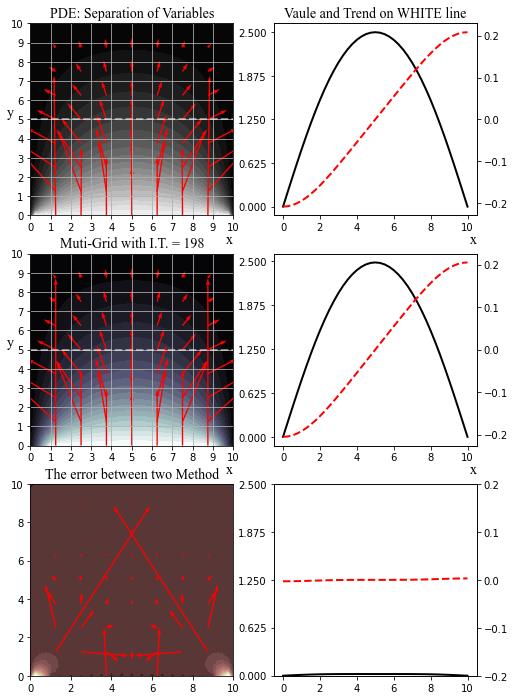

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))

################
a = 10
b = 10
u0 = 10

fineness = 0.25
a_total = (a)/fineness + 1
b_total = (b)/fineness + 1

iterationPDE = 200
levels = 20
centerPDE = int((a_total-1)/2)

xPDE = np.linspace(0, a, int(a_total))
yPDE = np.linspace(0, b, int(b_total))
XPDE, YPDE = np.meshgrid(xPDE, yPDE)
VPDE = np.zeros_like(XPDE)

for i in range(1, iterationPDE, 2):
    Bn = 4*u0 / (i*np.pi*np.sinh(i*np.pi*a / b))
    VPDE = VPDE + Bn*np.sinh(i*np.pi*(a - YPDE) / b)*np.sin(i*np.pi*XPDE / b)

EyPDE, ExPDE = np.gradient(-VPDE)
skip = (slice(None, None, 5),slice(None, None, 5))

p[0, 0].contourf(XPDE, YPDE, VPDE, levels, cmap=cm.gray)
p[0, 0].quiver(XPDE[skip], YPDE[skip], ExPDE[skip], EyPDE[skip], color = 'r', scale=2)
p[0, 0].plot(xPDE, YPDE[centerPDE,:],'--w', lw = 2, alpha = .5)
p[0, 0].set_xticks(np.linspace(0, a, 11))
p[0, 0].set_yticks(np.linspace(0, b, 11))
p[0, 0].grid()
p[0, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[0, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0, 0].set_title("PDE: Separation of Variables", fontsize = 14, fontname = 'Times New Roman')

p[0, 1].plot(xPDE, VPDE[centerPDE,:],'k', lw = 2)
p[0, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[0, 1].twinx()
ax2.plot(xPDE, ExPDE[centerPDE,:],'--r', lw = 2)
p[0, 1].set_title("Vaule and Trend on WHITE line", fontsize = 14, fontname = 'Times New Roman')
p[0, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

###############

fineness = 1
iteration = 66
levels = 20

x_start = 0
x_end   = 10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = 10
y_total = x_total

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCD, BCU, BCR, BCL = (10, 0, 0, 0)
V[0, :] = BCD
V[int(x_total-1), :] = BCU
V[:, 0] = BCL
V[:, int(y_total-1)] = BCR

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4

center = int((x_total-1)/2)
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 1),slice(None, None, 1))

x_total = int(len(x)*2) - 1
y_total = x_total
center = int((x_total-1)/2)

x2 = np.linspace(x_start, x_end, x_total)
y2 = np.linspace(y_start, y_end, y_total)

X2, Y2 = np.meshgrid(x2, y2, indexing = 'xy')
V2 = np.zeros_like(X2)

for i in range(0, len(x)):
    for j in range(0, len(y)):
        V2[2*(j), 2*(i)] = V[j, i]

for i in range(0, len(x)):
    for j in range(0, len(y)):
        if (i <= len(x)-2 and j <= len(y)-2):
            V2[2*(j), 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)])/2
            V2[2*(j)+1, 2*(i)] = (V2[2*(j), 2*(i)] + V2[2*(j+1), 2*(i)])/2
            V2[2*(j)+1, 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)] + V2[2*(j+1), 2*(i)] + V2[2*(j+1), 2*(i+1)])/4
        if (i == len(x)-1 and j <= len(y)-2):
            V2[2*(j)+1, 2*(i)] = (V2[2*(j), 2*(i)] + V2[2*(j+1), 2*(i)])/2
        if (i <= len(x)-2 and j == len(y)-1):
            V2[2*(j), 2*(i)+1] = (V2[2*(j), 2*(i)] + V2[2*(j), 2*(i+1)])/2

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V2[j, i] = (V2[j-1, i] + V2[j+1, i] + V2[j, i-1] + V2[j, i+1])/4

Ey, Ex = np.gradient(-V2)
skip = (slice(None, None, 2),slice(None, None, 2))

x_total = int(len(x2)*2) - 1
y_total = x_total
center = int((x_total-1)/2)

x3 = np.linspace(x_start, x_end, int(x_total))
y3 = np.linspace(y_start, y_end, int(y_total))

X3, Y3 = np.meshgrid(x3, y3, indexing = 'xy')
V3 = np.zeros_like(X3)

for i in range(0, len(x2)):
    for j in range(0, len(y2)):
        V3[2*(j), 2*(i)] = V2[j, i]

for i in range(0, len(x2)):
    for j in range(0, len(y2)):
        if (i <= len(x2)-2 and j <= len(y2)-2):
            V3[2*(j), 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)])/2
            V3[2*(j)+1, 2*(i)] = (V3[2*(j), 2*(i)] + V3[2*(j+1), 2*(i)])/2
            V3[2*(j)+1, 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)] + V3[2*(j+1), 2*(i)] + V3[2*(j+1), 2*(i+1)])/4
        if (i == len(x2)-1 and j <= len(y2)-2):
            V3[2*(j)+1, 2*(i)] = (V3[2*(j), 2*(i)] + V3[2*(j+1), 2*(i)])/2
        if (i <= len(x2)-2 and j == len(y2)-1):
            V3[2*(j), 2*(i)+1] = (V3[2*(j), 2*(i)] + V3[2*(j), 2*(i+1)])/2

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V3[j, i] = (V3[j-1, i] + V3[j+1, i] + V3[j, i-1] + V3[j, i+1])/4

Ey, Ex = np.gradient(-V3)
skip = (slice(None, None, 5),slice(None, None, 5))

p[1, 0].contourf(X3, Y3, V3, levels, cmap=cm.bone)
p[1, 0].quiver(X3[skip], Y3[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[1, 0].plot(x3, Y3[center,:],'--w', lw = 2, alpha = .5)
p[1, 0].set_xticks(np.linspace(0, 10, 11))
p[1, 0].set_yticks(np.linspace(0, 10, 11))
p[1, 0].grid()
p[1, 0].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
p[1, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
lable_name = "Muti-Grid with I.T. = " + str('%d' % (iteration*3))
p[1, 0].set_title(lable_name, fontsize = 14, fontname = 'Times New Roman')

p[1, 1].plot(x3, V3[center,:],'k', lw = 2)
p[1, 1].set_xlabel('x', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', horizontalalignment='right', x=1.0)
ax2=p[1, 1].twinx()
ax2.plot(x3, Ex[center,:],'--r', lw = 2)
p[1, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

####################

p[2, 0].contourf(X3, Y3, VPDE-V3, levels, cmap=cm.pink)
p[2, 0].quiver(X3[skip], Y3[skip], ExPDE[skip]-Ex[skip], EyPDE[skip]-Ey[skip], color = 'r', scale=0.1)
p[2, 0].set_title("The error between two Method", fontsize = 14, fontname = 'Times New Roman')
p[2, 1].plot(x3, VPDE[center,:]-V3[center,:],'k', lw = 2)
ax2=p[2, 1].twinx()
ax2.plot(x3, ExPDE[center,:]-Ex[center,:],'--r', lw = 2)
p[2, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))

plt.savefig("FR-12b.pdf")

## Relaxation method & Abitraty Boundary

61.0
61.0


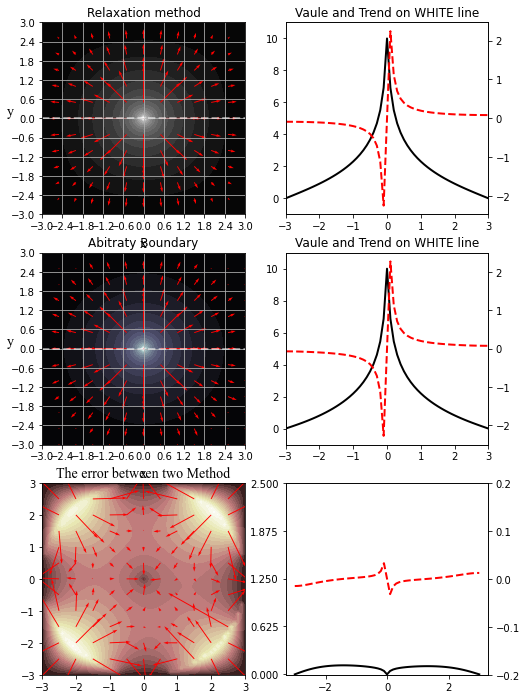

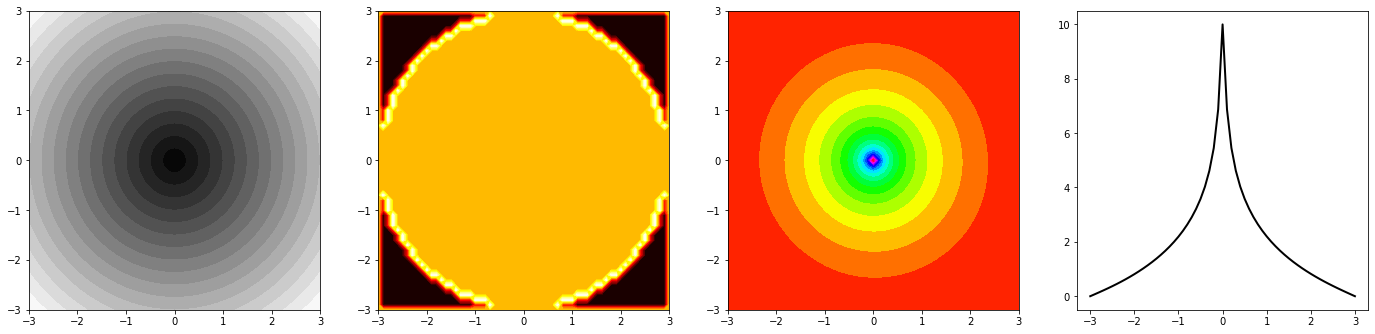

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=2, nrows=3, figsize=(8, 12))

iteration = 5000
fineness = 0.1
levels = 20

x_start = -3
x_end   = 3
x_total = (x_end - x_start)/fineness + 1

y_start = -3
y_end   = 3

y_total = x_total
center_x = int((x_total-1)/2)
center_y = int((y_total-1)/2)
center = int((x_total-1)/2)

xR = np.linspace(x_start, x_end, int(x_total))
yR = np.linspace(y_start, y_end, int(y_total))

XR, YR = np.meshgrid(xR, yR, indexing = 'xy')
VR = np.zeros_like(XR)

# 邊界條件
BCL, BCR, BCU, BCD = (0, 0, 0, 0)
VR[:, 0] = BCL
VR[:, int(y_total)-1] = BCR
VR[0, :] = BCD
VR[int(x_total)-1, :] = BCU

VR[center_y, center_x] = 10

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            VR[j, i] = (VR[j-1, i] + VR[j+1, i] + VR[j, i-1] + VR[j, i+1])/4
            VR[center_y, center_x] = 10
            
EyR, ExR = np.gradient(-VR)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[0, 0].contourf(XR, YR, VR, levels, cmap=cm.gray)
p[0, 0].quiver(XR[skip], YR[skip], ExR[skip], EyR[skip], color = 'r', scale=2)
p[0, 0].plot(xR, YR[center,:],'--w', lw = 2, alpha = .5)
p[0, 0].set_xticks(np.linspace(x_start, x_end, 11))
p[0, 0].set_yticks(np.linspace(y_start, y_end, 11))
p[0, 0].grid()
p[0, 0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[0, 0].set_title("Relaxation method")

p[0, 1].plot(xR, VR[center,:],'k', lw = 2)
ax2=p[0, 1].twinx()
ax2.plot(xR, ExR[center,:],'--r', lw = 2)
p[0, 1].set_xlim([x_start, x_end])
p[0, 1].set_ylim([-1, 11])
p[0, 1].set_title("Vaule and Trend on WHITE line")
print(x_total)

##############################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
counter = 0

R = 3
RV = 0

x_start = -3
x_end   = 3
y_start = -3
y_end   = 3

start = -3
end   = +3
total = (end - start)/fineness + 1

x_total = total
y_total = total

x = np.linspace(start, end, int(x_total))
y = np.linspace(start, end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X) + RV
V_distance = np.zeros_like(X)
V_marker = np.zeros_like(X)
V_next = np.zeros_like(X)

center_x = int((total-1)/2)
center_y = int((total-1)/2)
center = int((total-1)/2)


for i in range(0, int(x_total)):
    for j in range(0, int(y_total)):
        V_distance[j, i] = (((j-center_y)*fineness)**2 + ((i-center_x)*fineness)**2)**0.5

for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_distance[j, i] > R): V_marker[j, i] = -1
        elif(V_distance[j, i] == R): V_marker[j, i] = 0
        else: V_marker[j, i] = +1
            
for i in range(1, int(x_total)-1):
    for j in range(1, int(y_total)-1):
        if(V_marker[j, i] == -1 and (V_marker[j, i+1] != 1) and (V_marker[j, i-1] != 1) and (V_marker[j+1, i] != 1) and (V_marker[j-1, i] != 1)): V_marker[j, i] = -2
        elif(V_marker[j, i] == 1 and (V_marker[j, i+1] != -1) and (V_marker[j, i-1] != -1) and (V_marker[j+1, i] != -1) and (V_marker[j-1, i] != -1)): V_marker[j, i] = 0
        elif(V_distance[j, i] == R): V_marker[j, i] = 2
        else: V_marker[j, i] = V_marker[j, i]

sign = 0
RVxen = 0
Vxen = 0
RVxen = 0
Vxen = 0
counter = 0

V[center_y, center_x] = 10

for s in range(1, iteration):
    for j in range(1, int(y_total)-1):
        for i in range(1, int(x_total)-1):
            if(V_marker[j, i] == 1):
                if(V_marker[j, i-1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = -1
                    RVxen = 1
                    Vxen = 0
                elif(V_marker[j, i+1] == -1):
                    a = abs(((R*R-(j*fineness)*(j*fineness))**(0.5))-i*fineness)/fineness
                    sign = +1
                    RVxen = 1
                    Vxen = 0
                else:
                    a = 1
                    sign = -1
                    RVxen = 0
                    Vxen = 1
                
                if(V_marker[j-1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = -1
                    RVyen = 1
                    Vyen = 0
                elif(V_marker[j+1, i] == -1):
                    b = abs(((R*R-(i*fineness)*(i*fineness))**(0.5))-j*fineness)/fineness
                    sign = +1
                    RVyen = 1
                    Vyen = 0
                else:
                    b = 1
                    sign = -1
                    RVyen = 0
                    Vyen = 1
                V_next[j, i] = ((a*b)/(a+b))*((V[j, i+sign]/(1+a))+((RV*RVxen+V[j, i-sign]*Vxen)/(a*(1+a)))+(V[j+sign, i]/(1+b))+((RV*RVyen+V[j-sign, i]*Vyen)/(b*(1+b))))

            elif(V_marker[j, i] == 2 or V_marker[j, i] == -2 or V_marker[j, i] == -1): V_next[j, i] = RV
            elif(V_marker[j, i] == 0): V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            else: V_next[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
            V = V_next
            V[center_y, center_x] = 10

V [0,:] = RV
V [:,0] = RV
V [int(y_total-1),:] = RV
V [:,int(x_total-1)] = RV

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

pvj = p[1, 0].contourf(X, Y, V, levels, cmap=cm.bone)
p[1, 0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'r', scale=2)
p[1, 0].plot(x, Y[center,:],'--w', lw = 2, alpha = .5)
p[1, 0].set_xticks(np.linspace(x_start, x_end, 11))
p[1, 0].set_yticks(np.linspace(y_start, y_end, 11))
p[1, 0].set_xlim([x_start, x_end])
p[1, 0].set_ylim([y_start, y_end])
p[1, 0].grid()
p[1, 0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[1, 0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[1, 0].set_title("Abitraty Boundary")

p[1, 1].plot(x, V[center,:],'k', lw = 2)
ax2=p[1, 1].twinx()
ax2.plot(x, Ex[center,:],'--r', lw = 2)
p[1, 1].set_xlim([x_start, x_end])
p[1, 1].set_ylim([-1, 11])
p[1, 1].set_title("Vaule and Trend on WHITE line")
print(x_total)


fig, pp = plt.subplots(ncols=4, nrows=1, figsize=(24, 5.5))
pp[0].contourf(X, Y, V_distance, levels, cmap=cm.gray)
pp[1].contourf(X, Y, V_marker, levels, cmap=cm.hot)
pp[2].contourf(X, Y, V, levels, cmap=cm.hsv) 
pp[3].plot(x, V[center_y,:],'k', lw = 2) 

#############################

p[2, 0].contourf(X, Y, VR-V, levels, cmap=cm.pink)
p[2, 0].quiver(X[skip], Y[skip], ExR[skip]-Ex[skip], EyR[skip]-Ey[skip], color = 'r', scale=0.1)
p[2, 0].set_title("The error between two Method", fontsize = 14, fontname = 'Times New Roman')
p[2, 1].plot(x, VR[center,:]-V[center,:],'k', lw = 2)
ax2=p[2, 1].twinx()
ax2.plot(x, ExR[center,:]-Ex[center,:],'--r', lw = 2)
p[2, 1].set_yticks(np.linspace(2.5, 0, 5))
ax2.set_yticks(np.linspace(-0.2, 0.2, 5))